# Симсоны в AI

__DSSM-2 Научите искусственный интеллект писать сценарий сериала__

Данные взяты с первоисточника: https://data.world/data-society/the-simpsons-by-the-data  
Набор данных содержит персонажи, местоположения, детали эпизодов и фразы диалогов примерно для 600 эпизодов Симпсонов.  
Марофон проходился сайтом "Нетология" (https://netology.ru/) 10 ноября — 12 ноября 2020 года.  
Данный блокнот является доработанным вариантом блокнота, представленного на марафоне.

## Загружаем данные

In [1]:
import time
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from random import choice, shuffle, random, randint, choices

Стоп слова, нужны для отсева часто употребимых слов в словаре.

In [2]:
stops = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 
         'w', 'x', 'y', 'z', 'about', 'above', 'according', 'across', 'actually', 'ad', 'adj', 'ae', 'af', 'after', 
         'afterwards', 'ag', 'again', 'against', 'ai', 'al', 'all', 'almost', 'alone', 'along', 'already', 'also', 
         'although', 'always', 'am', 'among', 'amongst', 'an', 'and', 'another', 'any', 'anyhow', 'anyone', 'anything', 
         'anywhere', 'ao', 'aq', 'ar', 'are', 'aren', 'aren\'t', 'around', 'arpa', 'as', 'at', 'au', 'aw', 'az', 'ba', 
         'bb', 'bd', 'be', 'became', 'because', 'become', 'becomes', 'becoming', 'been', 'before', 'beforehand', 'begin', 
         'beginning', 'behind', 'being', 'below', 'beside', 'besides', 'between', 'beyond', 'bf', 'bg', 'bh', 'bi', 
         'billion', 'bj', 'bm', 'bn', 'bo', 'both', 'br', 'bs', 'bt', 'but', 'buy', 'bv', 'bw', 'by', 'bz', 'ca', 'can', 
         'can\'t', 'cannot', 'caption', 'cc', 'cd', 'cf', 'cg', 'ch', 'ci', 'ck', 'cl', 'click', 'cm', 'cn', 'co', 'co.', 
         'com', 'copy', 'could', 'couldn', 'couldn\'t', 'cr', 'cs', 'cu', 'cv', 'cx', 'cy', 'cz', 'de', 'did', 'didn', 
         'didn\'t', 'dj', 'dk', 'dm', 'do', 'does', 'doesn', 'doesn\'t', 'don', 'don\'t', 'down', 'during', 'dz', 'each', 
         'ec', 'edu', 'ee', 'eg', 'eh', 'eight', 'eighty', 'either', 'else', 'elsewhere', 'end', 'ending', 'enough', 'er', 
         'es', 'et', 'etc', 'even', 'ever', 'every', 'everyone', 'everything', 'everywhere', 'except', 'few', 'fi', 'fifty', 
         'find', 'first', 'five', 'fj', 'fk', 'fm', 'fo', 'for', 'former', 'formerly', 'forty', 'found', 'four', 'fr', 
         'free', 'from', 'further', 'fx', 'ga', 'gb', 'gd', 'ge', 'get', 'gf', 'gg', 'gh', 'gi', 'gl', 'gm', 'gmt', 'gn', 
         'go', 'gov', 'gp', 'gq', 'gr', 'gs', 'gt', 'gu', 'gw', 'gy', 'had', 'has', 'hasn', 'hasn\'t', 'have', 'haven', 
         'haven\'t', 'he', 'he\'d', 'he\'ll', 'he\'s', 'help', 'hence', 'her', 'here', 'here\'s', 'hereafter', 'hereby', 
         'herein', 'hereupon', 'hers', 'herself', 'him', 'himself', 'his', 'hk', 'hm', 'hn', 'home', 'homepage', 'how', 
         'however', 'hr', 'ht', 'htm', 'html', 'http', 'hu', 'hundred', 'i\'d', 'i\'ll', 'i\'m', 'i\'ve', 'i.e.', 'id', 
         'ie', 'if', 'ii', 'il', 'im', 'in', 'inc', 'inc.', 'indeed', 'information', 'instead', 'int', 'into', 'io', 'iq', 
         'ir', 'is', 'isn', 'isn\'t', 'it', 'it\'s', 'its', 'itself', 'je', 'jm', 'jo', 'join', 'jp', 'ke', 'kg', 'kh', 
         'ki', 'km', 'kn', 'koo', 'kp', 'kr', 'kw', 'ky', 'kz', 'la', 'last', 'later', 'latter', 'lb', 'lc', 'least', 
         'less', 'let', 'let\'s', 'li', 'like', 'likely', 'lk', 'll', 'lr', 'ls', 'lt', 'ltd', 'lu', 'lv', 'ly', 'ma', 
         'made', 'make', 'makes', 'many', 'maybe', 'mc', 'md', 'me', 'meantime', 'meanwhile', 'mg', 'mh', 'microsoft', 
         'might', 'mil', 'million', 'miss', 'mk', 'ml', 'mm', 'mn', 'mo', 'more', 'moreover', 'most', 'mostly', 'mp', 
         'mq', 'mr', 'mrs', 'ms', 'msie', 'mt', 'mu', 'much', 'must', 'mv', 'mw', 'mx', 'my', 'myself', 'mz', 'na', 
         'namely', 'nc', 'ne', 'neither', 'net', 'netscape', 'never', 'nevertheless', 'new', 'next', 'nf', 'ng', 'ni', 
         'nine', 'ninety', 'nl', 'no', 'nobody', 'none', 'nonetheless', 'noone', 'nor', 'not', 'nothing', 'now', 'nowhere', 
         'np', 'nr', 'nu', 'null', 'nz', 'of', 'off', 'often', 'om', 'on', 'once', 'one', 'one\'s', 'only', 'onto', 'or', 
         'org', 'other', 'others', 'otherwise', 'our', 'ours', 'ourselves', 'out', 'over', 'overall', 'own', 'pa', 'page', 
         'pe', 'per', 'perhaps', 'pf', 'pg', 'ph', 'pk', 'pl', 'pm', 'pn', 'pr', 'pt', 'pw', 'py', 'qa', 'rather', 're', 
         'recent', 'recently', 'reserved', 'ring', 'ro', 'ru', 'rw', 'sa', 'same', 'sb', 'sc', 'sd', 'se', 'seem', 'seemed', 
         'seeming', 'seems', 'seven', 'seventy', 'several', 'sg', 'sh', 'she', 'she\'d', 'she\'ll', 'she\'s', 'should', 
         'shouldn', 'shouldn\'t', 'si', 'since', 'site', 'six', 'sixty', 'sj', 'sk', 'sl', 'sm', 'sn', 'so', 'some', 
         'somehow', 'someone', 'something', 'sometime', 'sometimes', 'somewhere', 'sr', 'st', 'still', 'stop', 'su', 'such', 
         'sv', 'sy', 'sz', 'taking', 'tc', 'td', 'ten', 'text', 'tf', 'tg', 'test', 'th', 'than', 'that', 'that\'ll', 
         'that\'s', 'the', 'their', 'them', 'themselves', 'then', 'thence', 'there', 'there\'ll', 'there\'s', 'thereafter', 
         'thereby', 'therefore', 'therein', 'thereupon', 'these', 'they', 'they\'d', 'they\'ll', 'they\'re', 'they\'ve', 
         'thirty', 'this', 'those', 'though', 'thousand', 'three', 'through', 'throughout', 'thru', 'thus', 'tj', 'tk', 'tm', 
         'tn', 'to', 'together', 'too', 'toward', 'towards', 'tp', 'tr', 'trillion', 'tt', 'tv', 'tw', 'twenty', 'two', 'tz', 
         'ua', 'ug', 'uk', 'um', 'under', 'unless', 'unlike', 'unlikely', 'until', 'up', 'upon', 'us', 'use', 'used', 'using', 
         'uy', 'uz', 'va', 'vc', 've', 'very', 'vg', 'vi', 'via', 'vn', 'vu', 'was', 'wasn', 'wasn\'t', 'we', 'we\'d', 
         'we\'ll', 'we\'re', 'we\'ve', 'web', 'webpage', 'website', 'welcome', 'well', 'were', 'weren', 'weren\'t', 'wf', 
         'what', 'what\'ll', 'what\'s', 'whatever', 'when', 'whence', 'whenever', 'where', 'whereafter', 'whereas', 'whereby', 
         'wherein', 'whereupon', 'wherever', 'whether', 'which', 'while', 'whither', 'who', 'who\'d', 'who\'ll', 'who\'s', 
         'whoever', 'whole', 'whom', 'whomever', 'whose', 'why', 'will', 'with', 'within', 'without', 'won', 'won\'t', 
         'would', 'wouldn', 'wouldn\'t', 'ws', 'www', 'ye', 'yes', 'yet', 'you', 'you\'d', 'you\'ll', 'you\'re', 'you\'ve', 
         'your', 'yours', 'yourself', 'yourselves', 'yt', 'yu', 'za', 'zm', 'zr']

Собственно загрузили данные.

In [3]:
script_lines = pd.read_csv('data/simpsons_script_lines.csv')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (4,5,6) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
script_lines.head()

,id,episode_id,number,raw_text,timestamp_in_ms,speaking_line,character_id,location_id,raw_character_text,raw_location_text,spoken_words,normalized_text,word_count
0,9549,32,209,"Miss Hoover: No, actually, it was a little of ...",848000,True,464,3.0,Miss Hoover,Springfield Elementary School,"No, actually, it was a little of both. Sometim...",no actually it was a little of both sometimes ...,31
1,9550,32,210,Lisa Simpson: (NEAR TEARS) Where's Mr. Bergstrom?,856000,True,9,3.0,Lisa Simpson,Springfield Elementary School,Where's Mr. Bergstrom?,wheres mr bergstrom,3
2,9551,32,211,Miss Hoover: I don't know. Although I'd sure l...,856000,True,464,3.0,Miss Hoover,Springfield Elementary School,I don't know. Although I'd sure like to talk t...,i dont know although id sure like to talk to h...,22
3,9552,32,212,Lisa Simpson: That life is worth living.,864000,True,9,3.0,Lisa Simpson,Springfield Elementary School,That life is worth living.,that life is worth living,5
4,9553,32,213,Edna Krabappel-Flanders: The polls will be ope...,864000,True,40,3.0,Edna Krabappel-Flanders,Springfield Elementary School,The polls will be open from now until the end ...,the polls will be open from now until the end ...,33


Собрали список названий мест событий.

In [5]:
locations = list(set(script_lines['raw_location_text'].to_list()))

In [6]:
len(locations)

4499

Собрали список 20 самых "говорливых" персонажей.

In [7]:
actors = Counter(script_lines['raw_character_text'].to_list()).most_common(21)

In [8]:
actors = [actor[0] for actor in actors if actor[0] is not np.nan]

In [9]:
actors

['Homer Simpson',
 'Marge Simpson',
 'Bart Simpson',
 'Lisa Simpson',
 'C. Montgomery Burns',
 'Moe Szyslak',
 'Seymour Skinner',
 'Ned Flanders',
 'Grampa Simpson',
 'Milhouse Van Houten',
 'Chief Wiggum',
 'Krusty the Clown',
 'Nelson Muntz',
 'Lenny Leonard',
 'Apu Nahasapeemapetilon',
 'Waylon Smithers',
 'Kent Brockman',
 'Carl Carlson',
 'Edna Krabappel-Flanders',
 'Dr. Julius Hibbert']

In [10]:
len(actors)

20

Подготовили фразы диалогов.

In [11]:
phrases = script_lines['normalized_text']

In [12]:
text = [[c.lower() for c in ph if c.isalpha() or c.isspace()] for ph in phrases if ph is not np.nan and len(ph) < 50]

In [13]:
print(text[0:5])

[['w', 'h', 'e', 'r', 'e', 's', ' ', 'm', 'r', ' ', 'b', 'e', 'r', 'g', 's', 't', 'r', 'o', 'm'], ['t', 'h', 'a', 't', ' ', 'l', 'i', 'f', 'e', ' ', 'i', 's', ' ', 'w', 'o', 'r', 't', 'h', ' ', 'l', 'i', 'v', 'i', 'n', 'g'], ['i', ' ', 'd', 'o', 'n', 't', ' ', 't', 'h', 'i', 'n', 'k', ' ', 't', 'h', 'e', 'r', 'e', 's', ' ', 'a', 'n', 'y', 't', 'h', 'i', 'n', 'g', ' ', 'l', 'e', 'f', 't', ' ', 't', 'o', ' ', 's', 'a', 'y'], ['b', 'a', 'r', 't'], ['v', 'i', 'c', 't', 'o', 'r', 'y', ' ', 'p', 'a', 'r', 't', 'y', ' ', 'u', 'n', 'd', 'e', 'r', ' ', 't', 'h', 'e', ' ', 's', 'l', 'i', 'd', 'e']]


In [14]:
len(text)

81373

Формируем список слов употребимых в диалогах для каждого персонажа.

In [15]:
def check_symbols(value):
    for letter in value:
        if not letter in "abcdefghjklmnopqrstuvwxyz ":
            return False
    return True

In [16]:
actor_words ={}

In [17]:
for actor in actors:
    _phrases = script_lines.loc[script_lines['raw_character_text'] == actor, 'normalized_text'].to_list()
    words = []
    [words.extend(ph.split()) for ph in _phrases if ph is not np.nan and check_symbols(ph) and len(ph) < 50]
    actor_words[actor] = list(set(words) - set(stops))

## Делаем словарь

In [18]:
CHARS = set('abcdefghijklmnopqrstuvwxyz ')

In [19]:
INDEX_TO_CHAR = ['none'] + [w for w in CHARS]

In [20]:
CHAR_TO_INDEX = {w: i for i, w in enumerate(INDEX_TO_CHAR)}

In [21]:
print(CHAR_TO_INDEX)

{'none': 0, 'u': 1, 'n': 2, 'i': 3, 'd': 4, 'b': 5, 'l': 6, 'w': 7, 'm': 8, 's': 9, 't': 10, 'y': 11, 'v': 12, 'a': 13, 'j': 14, 'h': 15, 'p': 16, 'q': 17, 'k': 18, 'o': 19, 'e': 20, ' ': 21, 'f': 22, 'g': 23, 'c': 24, 'r': 25, 'x': 26, 'z': 27}


## Строим данные

In [22]:
dev = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

In [23]:
dev

device(type='cuda')

In [24]:
MAX_LEN = 50

In [25]:
X = torch.zeros((len(text), MAX_LEN), dtype=int)

In [26]:
for i in range(len(text)):
    for j, w in enumerate(text[i]):
        if j >= MAX_LEN:
            break
        X[i, j] = CHAR_TO_INDEX.get(w, CHAR_TO_INDEX['none'])

In [27]:
X[0:5]

tensor([[ 7, 15, 20, 25, 20,  9, 21,  8, 25, 21,  5, 20, 25, 23,  9, 10, 25, 19,
          8,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
          0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
        [10, 15, 13, 10, 21,  6,  3, 22, 20, 21,  3,  9, 21,  7, 19, 25, 10, 15,
         21,  6,  3, 12,  3,  2, 23,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
          0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
        [ 3, 21,  4, 19,  2, 10, 21, 10, 15,  3,  2, 18, 21, 10, 15, 20, 25, 20,
          9, 21, 13,  2, 11, 10, 15,  3,  2, 23, 21,  6, 20, 22, 10, 21, 10, 19,
         21,  9, 13, 11,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
        [ 5, 13, 25, 10,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
          0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
          0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
        [12,  3, 24, 10, 19, 25, 11, 21, 16, 13, 25, 10, 11, 21,  1,  2,  4, 20,
       

## Делаем нейронную сеть

In [28]:
class Network(torch.nn.Module):

    def __init__(self):
        super(Network, self).__init__()
        self.word_embeddings = torch.nn.Embedding(len(INDEX_TO_CHAR), 28)
        self.gru = torch.nn.GRU(28, 128, batch_first=True)
        self.hidden2tag = torch.nn.Linear(128, len(INDEX_TO_CHAR))

    def forward(self, sentences):
        embeds = self.word_embeddings(sentences)
        gru_out, state = self.gru(embeds)
        tag_space = self.hidden2tag(gru_out.reshape(-1, 128))
        return tag_space.reshape(sentences.shape[0], sentences.shape[1], -1), state

    def forward_state(self, sentences, state):
        embeds = self.word_embeddings(sentences)
        gru_out, state = self.gru(embeds, state)
        tag_space = self.hidden2tag(gru_out.reshape(-1, 128))
        return tag_space.reshape(sentences.shape[0], sentences.shape[1], -1), state

In [29]:
model = Network().to(dev)

In [30]:
X[0:5]

tensor([[ 7, 15, 20, 25, 20,  9, 21,  8, 25, 21,  5, 20, 25, 23,  9, 10, 25, 19,
          8,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
          0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
        [10, 15, 13, 10, 21,  6,  3, 22, 20, 21,  3,  9, 21,  7, 19, 25, 10, 15,
         21,  6,  3, 12,  3,  2, 23,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
          0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
        [ 3, 21,  4, 19,  2, 10, 21, 10, 15,  3,  2, 18, 21, 10, 15, 20, 25, 20,
          9, 21, 13,  2, 11, 10, 15,  3,  2, 23, 21,  6, 20, 22, 10, 21, 10, 19,
         21,  9, 13, 11,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
        [ 5, 13, 25, 10,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
          0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
          0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
        [12,  3, 24, 10, 19, 25, 11, 21, 16, 13, 25, 10, 11, 21,  1,  2,  4, 20,
       

In [31]:
model.forward(X[0:1].to(dev))[0].shape

torch.Size([1, 50, 28])

## Генерируем предложение

In [32]:
def generate_sentence():
  actor = choice(actors)
  sentence = list(choice(actor_words[actor]))

  state = None
  for i in range(MAX_LEN):
    _X = torch.Tensor([[CHAR_TO_INDEX[sentence[i]]]]).type(torch.long).to(dev)
    if i == 0:
      result, state = model.forward(_X)
    else:
      result, state = model.forward_state(_X, state)
    prediction = result[0, -1, :]
    index_of_prediction = prediction.argmax()
    if i >= len(sentence) - 1:
      if index_of_prediction == 0:
        break
      sentence.append(INDEX_TO_CHAR[index_of_prediction])

  print(f'{actor}: {"".join(sentence)}')

In [33]:
generate_sentence()

Bart Simpson: poopybdudududududududududududududududududududududud


## обучение

In [34]:
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=.05)

In [35]:
len(X)/100

813.73

In [36]:
i = 1320
print(i * 100)
print((i + 1) * 100)

132000
132100


In [37]:
def shuffle_tensor(value):
    length = value.shape[0]
    result = value
    order = np.array(range(length))
    np.random.shuffle(order)
    result[np.array(range(length))] = value[order]
    return result

In [38]:
losses = []

for ep in range(4000):
  start = time.time()
  train_loss = 0.
  train_passed = 0
  X = shuffle_tensor(X)

  for i in range(int(len(X) / 100)):
    batch = shuffle_tensor(X[i * 100:(i + 1) * 100]).to(dev)
    X_batch = batch[:, :-1]
    Y_batch = batch[:, 1:].flatten()

    optimizer.zero_grad()
    answers, _ = model.forward(X_batch)
    answers = answers.view(-1, len(INDEX_TO_CHAR))
    loss = criterion(answers, Y_batch)
    train_loss += loss.item()

    loss.backward()
    optimizer.step()
    train_passed += 1
    
    losses.append(train_loss / train_passed)

#   if ep % 100 == 0:
  print("Epoch {}. Time: {:.3f}, Train loss: {:.3f}".format(ep, time.time() - start, train_loss / train_passed))
  generate_sentence()

Epoch 0. Time: 4.095, Train loss: 1.470
Carl Carlson: nuts at ot o to the t ot o to the t ot o to the t o
Epoch 1. Time: 4.039, Train loss: 1.309
Chief Wiggum: hah at he the the the the the the the the the the t
Epoch 2. Time: 4.012, Train loss: 1.248
Seymour Skinner: whats the the the the the the the the the the the t
Epoch 3. Time: 4.105, Train loss: 1.213
Grampa Simpson: rube the the the the the the the the the the the th
Epoch 4. Time: 4.044, Train loss: 1.188
Kent Brockman: ah the the the the the the the the the the the the 
Epoch 5. Time: 4.050, Train loss: 1.167
Lenny Leonard: con the the the the the the the the the the the the
Epoch 6. Time: 4.047, Train loss: 1.148
Bart Simpson: woodpecker the the the the the the the the the the 
Epoch 7. Time: 4.047, Train loss: 1.131
Marge Simpson: camelot i the the the the the the the the the the t
Epoch 8. Time: 4.050, Train loss: 1.115
Ned Flanders: pleasure the the the the the the the the the the th
Epoch 9. Time: 4.037, Train loss: 1.10

Epoch 79. Time: 4.068, Train loss: 0.820
Ned Flanders: destruction the stop the stop the can it
Epoch 80. Time: 4.046, Train loss: 0.818
Nelson Muntz: showman i dont this is the stop the can it
Epoch 81. Time: 4.047, Train loss: 0.817
Carl Carlson: whos the stand the stop the can i dont this is the 
Epoch 82. Time: 4.144, Train loss: 0.816
Bart Simpson: hooker what are you think you think you think it
Epoch 83. Time: 4.123, Train loss: 0.815
C. Montgomery Burns: thats a little some on the car
Epoch 84. Time: 4.063, Train loss: 0.814
Carl Carlson: need the stop the stop the car
Epoch 85. Time: 4.063, Train loss: 0.813
Marge Simpson: ate the stop the stop the car
Epoch 86. Time: 4.085, Train loss: 0.811
Edna Krabappel-Flanders: started the stop the stop the car
Epoch 87. Time: 4.168, Train loss: 0.810
Grampa Simpson: clammy is the stop the stop the stop the car
Epoch 88. Time: 4.152, Train loss: 0.809
Lenny Leonard: pants a better the stop the car
Epoch 89. Time: 4.209, Train loss: 0.808

Epoch 166. Time: 4.177, Train loss: 0.758
Krusty the Clown: banana the store the store the store
Epoch 167. Time: 4.061, Train loss: 0.758
Homer Simpson: bunch the store the store the store
Epoch 168. Time: 4.060, Train loss: 0.757
Dr. Julius Hibbert: problem is the back to the started the store
Epoch 169. Time: 4.123, Train loss: 0.757
Milhouse Van Houten: uncle the store the store the store
Epoch 170. Time: 4.150, Train loss: 0.756
Dr. Julius Hibbert: youll take the store the store
Epoch 171. Time: 4.104, Train loss: 0.756
Seymour Skinner: blasted the store the store
Epoch 172. Time: 4.067, Train loss: 0.755
Edna Krabappel-Flanders: yayyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyy
Epoch 173. Time: 4.096, Train loss: 0.755
Dr. Julius Hibbert: fell me i want to see you to the start
Epoch 174. Time: 4.196, Train loss: 0.755
C. Montgomery Burns: ohhh what are you got a little man
Epoch 175. Time: 4.157, Train loss: 0.754
Waylon Smithers: theres a baby the store the store
Epoch 176. Ti

Epoch 253. Time: 4.295, Train loss: 0.731
Dr. Julius Hibbert: leaves the start and i want to see the car
Epoch 254. Time: 4.241, Train loss: 0.730
Kent Brockman: huh what are you too house
Epoch 255. Time: 4.460, Train loss: 0.730
Dr. Julius Hibbert: try the baby what are you too
Epoch 256. Time: 4.279, Train loss: 0.730
Chief Wiggum: lost the baby what are you too
Epoch 257. Time: 4.247, Train loss: 0.730
C. Montgomery Burns: operation the baby we can i got a little simpson
Epoch 258. Time: 4.463, Train loss: 0.729
Grampa Simpson: cooking the store the store the store
Epoch 259. Time: 4.485, Train loss: 0.729
Lenny Leonard: wowww
Epoch 260. Time: 4.354, Train loss: 0.729
Lenny Leonard: jolly what are you too house
Epoch 261. Time: 4.298, Train loss: 0.729
Waylon Smithers: talking the store the store the store
Epoch 262. Time: 4.389, Train loss: 0.728
Lisa Simpson: hart a little simpson i dont know what are you to s
Epoch 263. Time: 4.452, Train loss: 0.728
Grampa Simpson: nunchucks a 

Epoch 340. Time: 4.415, Train loss: 0.714
Marge Simpson: lunch the baby the story stupid to the baby
Epoch 341. Time: 4.449, Train loss: 0.714
Ned Flanders: lovejoy the story stupid to the baby
Epoch 342. Time: 4.406, Train loss: 0.714
Waylon Smithers: coats a little simpson i cant be so marge
Epoch 343. Time: 4.488, Train loss: 0.714
Grampa Simpson: put the baby the baby the baby
Epoch 344. Time: 4.492, Train loss: 0.714
Marge Simpson: sunk you to the state the baby
Epoch 345. Time: 4.391, Train loss: 0.713
Dr. Julius Hibbert: theyre gonna be a start and the baby
Epoch 346. Time: 4.552, Train loss: 0.713
Lisa Simpson: son i want to see the baby the story
Epoch 347. Time: 4.436, Train loss: 0.713
Edna Krabappel-Flanders: keys i want to see the car
Epoch 348. Time: 4.440, Train loss: 0.713
Lisa Simpson: skater is the boys like the baby
Epoch 349. Time: 4.436, Train loss: 0.713
Krusty the Clown: downward the store started the store
Epoch 350. Time: 4.421, Train loss: 0.713
Homer Simpson:

Epoch 428. Time: 4.542, Train loss: 0.703
Nelson Muntz: burns it was a second to the baby
Epoch 429. Time: 4.386, Train loss: 0.703
Edna Krabappel-Flanders: really we can see you to the baby
Epoch 430. Time: 4.388, Train loss: 0.703
Carl Carlson: yup what are you doing to see the car
Epoch 431. Time: 4.422, Train loss: 0.703
Moe Szyslak: easter the state the story stupid started
Epoch 432. Time: 4.463, Train loss: 0.703
Nelson Muntz: shut up the baby we can see you a started
Epoch 433. Time: 4.400, Train loss: 0.703
Carl Carlson: taste the baby the story stupid store
Epoch 434. Time: 4.446, Train loss: 0.703
Dr. Julius Hibbert: slobber i want to go to the store
Epoch 435. Time: 4.413, Train loss: 0.702
Homer Simpson: maarge its a started the store
Epoch 436. Time: 4.401, Train loss: 0.702
Kent Brockman: say it is the baby we have to see you and started
Epoch 437. Time: 4.504, Train loss: 0.702
Seymour Skinner: hey homer what are you doing to see the car
Epoch 438. Time: 4.431, Train lo

Epoch 515. Time: 4.588, Train loss: 0.695
Apu Nahasapeemapetilon: youre a second to the baby we can see you
Epoch 516. Time: 4.257, Train loss: 0.695
Seymour Skinner: plant the story stupid stuff is a baby
Epoch 517. Time: 4.415, Train loss: 0.695
Moe Szyslak: great the story stupid stop it is a baby
Epoch 518. Time: 4.520, Train loss: 0.695
Ned Flanders: amexy i can see you a minute
Epoch 519. Time: 4.550, Train loss: 0.695
Grampa Simpson: ah the story stupid stupid stupid stuff
Epoch 520. Time: 4.436, Train loss: 0.695
Seymour Skinner: teach the baby we can see you to the baby
Epoch 521. Time: 4.436, Train loss: 0.695
Edna Krabappel-Flanders: care of the car simpson
Epoch 522. Time: 4.444, Train loss: 0.694
Lenny Leonard: countdown there is the started the store
Epoch 523. Time: 4.413, Train loss: 0.694
Waylon Smithers: oh yeah well i want to go to the baby
Epoch 524. Time: 4.528, Train loss: 0.694
Lenny Leonard: unnecessary i want to go to the baby
Epoch 525. Time: 4.539, Train loss

Epoch 602. Time: 4.413, Train loss: 0.689
Kent Brockman: thousands the story store i can see you to the car
Epoch 603. Time: 4.450, Train loss: 0.689
Marge Simpson: sad i want to go to the baby
Epoch 604. Time: 4.451, Train loss: 0.689
Lisa Simpson: bunch the story stuff is the star homer
Epoch 605. Time: 4.438, Train loss: 0.689
Lisa Simpson: doys the best there is a baby
Epoch 606. Time: 4.437, Train loss: 0.689
Lenny Leonard: broom is the star homer
Epoch 607. Time: 4.443, Train loss: 0.689
Carl Carlson: back to the baby we can see you to the car
Epoch 608. Time: 4.424, Train loss: 0.689
Kent Brockman: plague is the story stupid stuff
Epoch 609. Time: 4.507, Train loss: 0.688
Apu Nahasapeemapetilon: dayyyyys i dont know what i dont know what i do
Epoch 610. Time: 4.371, Train loss: 0.688
Homer Simpson: mucus the story stupid stupid stuff
Epoch 611. Time: 4.305, Train loss: 0.688
Kent Brockman: records a little show it was a started
Epoch 612. Time: 4.133, Train loss: 0.688
Grampa Si

Epoch 690. Time: 4.545, Train loss: 0.684
Krusty the Clown: knew the baby we can see you to the car
Epoch 691. Time: 4.567, Train loss: 0.684
Moe Szyslak: landed the story store i can see you to the car
Epoch 692. Time: 4.570, Train loss: 0.684
Bart Simpson: elected the story started the baby
Epoch 693. Time: 4.614, Train loss: 0.684
Bart Simpson: robot i want to go to the baby
Epoch 694. Time: 4.719, Train loss: 0.684
Bart Simpson: cakes a little boy the story store
Epoch 695. Time: 4.578, Train loss: 0.684
Homer Simpson: yeah well i dont know what i dont know what i do
Epoch 696. Time: 4.573, Train loss: 0.684
Grampa Simpson: rugrats what are you doing the baby
Epoch 697. Time: 4.500, Train loss: 0.684
Lenny Leonard: employest the story stuff is the star homer
Epoch 698. Time: 4.532, Train loss: 0.684
Apu Nahasapeemapetilon: baby i was the store the story started
Epoch 699. Time: 4.401, Train loss: 0.684
Ned Flanders: whos the baby we have to see you to the car
Epoch 700. Time: 4.263

Epoch 778. Time: 4.585, Train loss: 0.680
Lenny Leonard: second the story store i want to go to the baby
Epoch 779. Time: 4.629, Train loss: 0.680
Ned Flanders: energy i want to go to the baby
Epoch 780. Time: 4.597, Train loss: 0.680
Milhouse Van Houten: noooooooooooooooooooooooooooooooooooooo
Epoch 781. Time: 4.580, Train loss: 0.680
C. Montgomery Burns: bad i was the store of the baby
Epoch 782. Time: 4.627, Train loss: 0.680
Carl Carlson: stopped the baby the story star homer
Epoch 783. Time: 4.667, Train loss: 0.680
Krusty the Clown: ptsdy what are you doing that was a start
Epoch 784. Time: 4.635, Train loss: 0.680
Homer Simpson: lamb it was a start the story
Epoch 785. Time: 4.659, Train loss: 0.680
Nelson Muntz: tell me a little boy
Epoch 786. Time: 4.674, Train loss: 0.680
Nelson Muntz: business a star star simpson
Epoch 787. Time: 4.678, Train loss: 0.680
Waylon Smithers: tomorrow bart i dont know what i do
Epoch 788. Time: 4.629, Train loss: 0.680
Moe Szyslak: rag a father i

Epoch 868. Time: 4.337, Train loss: 0.676
Waylon Smithers: joked the story stupid stuff
Epoch 869. Time: 4.321, Train loss: 0.676
Marge Simpson: looked to the baby the story started
Epoch 870. Time: 4.428, Train loss: 0.676
Apu Nahasapeemapetilon: penny the story star simpson
Epoch 871. Time: 4.321, Train loss: 0.676
Dr. Julius Hibbert: broken the story station
Epoch 872. Time: 4.422, Train loss: 0.676
C. Montgomery Burns: behold the story star simpson
Epoch 873. Time: 4.318, Train loss: 0.676
Chief Wiggum: wrap i want to get the baby
Epoch 874. Time: 4.262, Train loss: 0.676
Lisa Simpson: couldnt you say it is a baby
Epoch 875. Time: 4.255, Train loss: 0.676
Bart Simpson: song i was the story star homer
Epoch 876. Time: 4.335, Train loss: 0.676
Ned Flanders: gomorrah
Epoch 877. Time: 4.578, Train loss: 0.676
Chief Wiggum: food the story star simpson
Epoch 878. Time: 4.460, Train loss: 0.676
Krusty the Clown: gets a little boy the story star homer
Epoch 879. Time: 4.266, Train loss: 0.

Epoch 959. Time: 4.258, Train loss: 0.673
Bart Simpson: naked the boy thats a baby the story
Epoch 960. Time: 4.112, Train loss: 0.673
Marge Simpson: rude i want to go to the baby
Epoch 961. Time: 4.089, Train loss: 0.673
Nelson Muntz: totally the story star simpson
Epoch 962. Time: 4.283, Train loss: 0.673
Bart Simpson: song i want to go to the story
Epoch 963. Time: 4.272, Train loss: 0.673
Kent Brockman: meteor the star simpson i want to go to the baby
Epoch 964. Time: 4.405, Train loss: 0.673
Kent Brockman: congressman im gonna be a baby
Epoch 965. Time: 4.591, Train loss: 0.673
Grampa Simpson: laugh is the truth is the truth
Epoch 966. Time: 4.570, Train loss: 0.673
Homer Simpson: longer is the star is the star simpson
Epoch 967. Time: 4.719, Train loss: 0.673
Lisa Simpson: hollywood thats a big boy
Epoch 968. Time: 4.529, Train loss: 0.673
Moe Szyslak: easter the star simpson i was the story
Epoch 969. Time: 4.554, Train loss: 0.673
Milhouse Van Houten: unquote the story station


Epoch 1047. Time: 4.516, Train loss: 0.671
C. Montgomery Burns: care of the boy thats a baby the story
Epoch 1048. Time: 4.411, Train loss: 0.671
Dr. Julius Hibbert: code with the car a start and start the story
Epoch 1049. Time: 4.493, Train loss: 0.671
Grampa Simpson: love the story star simpson
Epoch 1050. Time: 4.417, Train loss: 0.671
Waylon Smithers: moe what are you doing here
Epoch 1051. Time: 4.377, Train loss: 0.671
C. Montgomery Burns: black the story star simpson
Epoch 1052. Time: 4.413, Train loss: 0.671
Lisa Simpson: shut up i dont know what i do
Epoch 1053. Time: 4.363, Train loss: 0.671
C. Montgomery Burns: rejection the star is the truth
Epoch 1054. Time: 4.391, Train loss: 0.671
Kent Brockman: today simpson i was the story
Epoch 1055. Time: 4.364, Train loss: 0.671
Nelson Muntz: class of the book and i dont know what i do
Epoch 1056. Time: 4.476, Train loss: 0.671
Grampa Simpson: rubber the story star simpson
Epoch 1057. Time: 4.561, Train loss: 0.671
Milhouse Van Hou

Epoch 1134. Time: 4.399, Train loss: 0.669
Waylon Smithers: smoke it in the car a start and start the story
Epoch 1135. Time: 4.345, Train loss: 0.669
Bart Simpson: actually i was the story start the story
Epoch 1136. Time: 4.418, Train loss: 0.669
Carl Carlson: sure i can see you at the car
Epoch 1137. Time: 4.782, Train loss: 0.669
Kent Brockman: people what do you think i dont know
Epoch 1138. Time: 4.239, Train loss: 0.669
Waylon Smithers: joker
Epoch 1139. Time: 4.526, Train loss: 0.669
Bart Simpson: days a little bart i want to get the baby
Epoch 1140. Time: 4.730, Train loss: 0.669
C. Montgomery Burns: ballaster the story star simpson
Epoch 1141. Time: 4.715, Train loss: 0.669
Bart Simpson: baron i want to go to the boy
Epoch 1142. Time: 4.462, Train loss: 0.669
Ned Flanders: heya homer i was the story star simpson
Epoch 1143. Time: 4.325, Train loss: 0.668
Ned Flanders: todd i want to go to the baby
Epoch 1144. Time: 4.354, Train loss: 0.669
Marge Simpson: cheese that was a big

Epoch 1222. Time: 4.294, Train loss: 0.667
Waylon Smithers: ready to be a baby the story
Epoch 1223. Time: 4.513, Train loss: 0.667
Marge Simpson: restage the story star simpson
Epoch 1224. Time: 4.204, Train loss: 0.667
C. Montgomery Burns: pearly and start the story start a little back
Epoch 1225. Time: 4.199, Train loss: 0.667
Moe Szyslak: maker is the star is the star is the stars
Epoch 1226. Time: 4.151, Train loss: 0.667
Milhouse Van Houten: butter simpson i want to get the car
Epoch 1227. Time: 4.234, Train loss: 0.667
Waylon Smithers: everyones a start and start the story
Epoch 1228. Time: 4.201, Train loss: 0.667
Kent Brockman: long a little bart i want to get the baby
Epoch 1229. Time: 4.566, Train loss: 0.667
Bart Simpson: corked the baby i want to get the baby
Epoch 1230. Time: 4.407, Train loss: 0.667
Carl Carlson: nature in the car and i dont know what i got
Epoch 1231. Time: 4.196, Train loss: 0.667
Homer Simpson: man the story star simpson is the world
Epoch 1232. Time:

Epoch 1308. Time: 4.259, Train loss: 0.665
Grampa Simpson: anybody is the star is the stars a start
Epoch 1309. Time: 4.218, Train loss: 0.665
Lenny Leonard: sober i want to go to the baby
Epoch 1310. Time: 4.126, Train loss: 0.665
Lisa Simpson: flanders what are you doing here
Epoch 1311. Time: 4.192, Train loss: 0.665
Homer Simpson: fakey the story star simpson
Epoch 1312. Time: 4.159, Train loss: 0.665
Carl Carlson: mother is the world is the worst
Epoch 1313. Time: 4.107, Train loss: 0.665
Apu Nahasapeemapetilon: truth the story start the story start and start
Epoch 1314. Time: 4.145, Train loss: 0.665
Kent Brockman: tony should i say it is the story
Epoch 1315. Time: 4.181, Train loss: 0.665
Waylon Smithers: memon star is the star is the stars a stars
Epoch 1316. Time: 4.229, Train loss: 0.665
Lisa Simpson: heart the story star is the stars a stars
Epoch 1317. Time: 4.130, Train loss: 0.665
Grampa Simpson: wheee
Epoch 1318. Time: 4.211, Train loss: 0.665
Krusty the Clown: banglade

Epoch 1393. Time: 4.347, Train loss: 0.664
Kent Brockman: bonnet you stop that i want to go to the baby
Epoch 1394. Time: 4.376, Train loss: 0.664
Homer Simpson: man the story star is the star is the stars
Epoch 1395. Time: 4.282, Train loss: 0.664
Grampa Simpson: cool the story start the story start and start
Epoch 1396. Time: 4.307, Train loss: 0.663
Grampa Simpson: theres a baby i want to get the baby
Epoch 1397. Time: 4.247, Train loss: 0.664
C. Montgomery Burns: clowns to the baby i was the story
Epoch 1398. Time: 4.400, Train loss: 0.663
Lisa Simpson: deaff it was a baby in the car
Epoch 1399. Time: 4.375, Train loss: 0.663
Dr. Julius Hibbert: bart i want to get the baby
Epoch 1400. Time: 4.259, Train loss: 0.663
Carl Carlson: fat the way to the baby i want to get the baby
Epoch 1401. Time: 4.268, Train loss: 0.663
Carl Carlson: taste me a little bart
Epoch 1402. Time: 4.279, Train loss: 0.663
Moe Szyslak: acronyms of the baby i want to go to the baby
Epoch 1403. Time: 4.352, Tra

Epoch 1479. Time: 4.221, Train loss: 0.662
Bart Simpson: open the car and i dont know what i got it
Epoch 1480. Time: 4.257, Train loss: 0.662
Seymour Skinner: takes the story start the story start the story
Epoch 1481. Time: 4.378, Train loss: 0.662
Lisa Simpson: beets are the star is the stars a little back
Epoch 1482. Time: 4.154, Train loss: 0.662
Milhouse Van Houten: knock it out of the baby in the car
Epoch 1483. Time: 4.136, Train loss: 0.662
Milhouse Van Houten: fluffy the way to the baby i want to get the baby
Epoch 1484. Time: 4.123, Train loss: 0.662
Kent Brockman: uh well i dont know what i got it
Epoch 1485. Time: 4.176, Train loss: 0.662
Carl Carlson: anybody is the story start the story
Epoch 1486. Time: 4.482, Train loss: 0.662
Chief Wiggum: spread a little bart i want to get the baby
Epoch 1487. Time: 4.716, Train loss: 0.662
Milhouse Van Houten: roosevelt i can do it
Epoch 1488. Time: 4.418, Train loss: 0.662
Apu Nahasapeemapetilon: smells all right i was the story
Ep

Epoch 1564. Time: 4.616, Train loss: 0.661
Moe Szyslak: oblongata in the story start the story
Epoch 1565. Time: 4.750, Train loss: 0.661
Krusty the Clown: floor of the baby i want to get the baby
Epoch 1566. Time: 4.644, Train loss: 0.661
Milhouse Van Houten: fun man i was the story start the story
Epoch 1567. Time: 4.647, Train loss: 0.661
Ned Flanders: news are the stand i want to get the baby
Epoch 1568. Time: 4.503, Train loss: 0.661
Chief Wiggum: aboard start the star is the stars are the stand
Epoch 1569. Time: 4.590, Train loss: 0.661
Krusty the Clown: customar is a baby in the car
Epoch 1570. Time: 4.550, Train loss: 0.661
Homer Simpson: unfolder that was a big stuff
Epoch 1571. Time: 4.589, Train loss: 0.661
Seymour Skinner: lousy thousand dollars
Epoch 1572. Time: 4.608, Train loss: 0.661
Lenny Leonard: owe me a little bart simpson
Epoch 1573. Time: 4.549, Train loss: 0.661
Marge Simpson: casbah what are you doing
Epoch 1574. Time: 4.657, Train loss: 0.661
Apu Nahasapeemapet

Epoch 1650. Time: 4.489, Train loss: 0.660
Bart Simpson: come on i want to get the baby
Epoch 1651. Time: 4.536, Train loss: 0.660
Waylon Smithers: robot is the star is the stars are the stand
Epoch 1652. Time: 4.588, Train loss: 0.660
Grampa Simpson: unadulterated the story start the story
Epoch 1653. Time: 4.616, Train loss: 0.660
Milhouse Van Houten: cowabungaaaaaaaaaaaaaaaaaaaaa
Epoch 1654. Time: 4.465, Train loss: 0.660
Homer Simpson: anchor is a book is the star is the stars
Epoch 1655. Time: 4.423, Train loss: 0.660
Lenny Leonard: showman start the story start the story
Epoch 1656. Time: 4.111, Train loss: 0.660
Kent Brockman: salest in the car is the stars a little back
Epoch 1657. Time: 4.298, Train loss: 0.660
Homer Simpson: dorentered the story start the story
Epoch 1658. Time: 4.253, Train loss: 0.660
Lisa Simpson: botzer is the star is the stars a little back
Epoch 1659. Time: 4.136, Train loss: 0.660
Ned Flanders: heck i want to go to the baby
Epoch 1660. Time: 4.139, Tra

Epoch 1737. Time: 4.114, Train loss: 0.659
Waylon Smithers: smoker is the state of the baby
Epoch 1738. Time: 4.094, Train loss: 0.659
Edna Krabappel-Flanders: knows the baby i want to get the baby
Epoch 1739. Time: 4.143, Train loss: 0.659
Seymour Skinner: band is the state of the baby
Epoch 1740. Time: 4.138, Train loss: 0.659
Lisa Simpson: scottsdale the story start the story
Epoch 1741. Time: 4.260, Train loss: 0.659
Krusty the Clown: solly i was the states are the stars are the stan
Epoch 1742. Time: 4.134, Train loss: 0.659
Kent Brockman: trophy what are you doing
Epoch 1743. Time: 4.164, Train loss: 0.659
Dr. Julius Hibbert: hold the star is the star is the stars
Epoch 1744. Time: 4.110, Train loss: 0.659
Dr. Julius Hibbert: hes a start the story start the story
Epoch 1745. Time: 4.141, Train loss: 0.659
Grampa Simpson: hey what are you doing here
Epoch 1746. Time: 4.139, Train loss: 0.659
Waylon Smithers: excuse me i want to get the baby
Epoch 1747. Time: 4.147, Train loss: 0.6

Epoch 1825. Time: 4.278, Train loss: 0.658
C. Montgomery Burns: consecomed i want to get the baby
Epoch 1826. Time: 4.265, Train loss: 0.658
Dr. Julius Hibbert: theyre gonna be the states are the stars
Epoch 1827. Time: 4.285, Train loss: 0.658
Marge Simpson: bonnets be a little bart
Epoch 1828. Time: 4.271, Train loss: 0.658
Apu Nahasapeemapetilon: handsome is the states are the stars
Epoch 1829. Time: 4.261, Train loss: 0.658
Krusty the Clown: ranged the story start the story
Epoch 1830. Time: 4.280, Train loss: 0.658
Dr. Julius Hibbert: problem start the star is the star is the star
Epoch 1831. Time: 4.343, Train loss: 0.658
Marge Simpson: boys the story start the story start and start
Epoch 1832. Time: 4.246, Train loss: 0.658
Moe Szyslak: deep the story start the story
Epoch 1833. Time: 4.363, Train loss: 0.658
Krusty the Clown: cleaned the baby the story start the story
Epoch 1834. Time: 4.339, Train loss: 0.658
Waylon Smithers: smoker is the state of the baby
Epoch 1835. Time: 4

Epoch 1911. Time: 4.347, Train loss: 0.657
Lenny Leonard: duction i was the best thing is the story
Epoch 1912. Time: 4.350, Train loss: 0.657
Kent Brockman: krusteloped the star is the star is so sorry
Epoch 1913. Time: 4.488, Train loss: 0.657
Kent Brockman: made of the baby i want to get the baby
Epoch 1914. Time: 4.382, Train loss: 0.657
Moe Szyslak: whatsa may i say something to the best thing
Epoch 1915. Time: 4.443, Train loss: 0.657
Grampa Simpson: pacemakers are the states
Epoch 1916. Time: 4.381, Train loss: 0.657
Grampa Simpson: catch the car is the baby the story
Epoch 1917. Time: 4.300, Train loss: 0.657
Bart Simpson: catchphrase the story start the story
Epoch 1918. Time: 4.385, Train loss: 0.657
Seymour Skinner: sad i have to get the car
Epoch 1919. Time: 4.280, Train loss: 0.657
Ned Flanders: know you wanted to get the baby
Epoch 1920. Time: 4.387, Train loss: 0.657
Lenny Leonard: famous are you a start the story
Epoch 1921. Time: 4.339, Train loss: 0.657
Kent Brockman:

Epoch 1997. Time: 4.325, Train loss: 0.656
Moe Szyslak: recoup i can see you a story start
Epoch 1998. Time: 4.394, Train loss: 0.656
Waylon Smithers: lord is the state of the baby the story
Epoch 1999. Time: 4.346, Train loss: 0.656
C. Montgomery Burns: play the story bart simpson
Epoch 2000. Time: 4.422, Train loss: 0.656
Waylon Smithers: gay the story boy i want to get the bar
Epoch 2001. Time: 4.374, Train loss: 0.656
Moe Szyslak: speaking of the baby the story
Epoch 2002. Time: 4.325, Train loss: 0.656
C. Montgomery Burns: door the story bart simpson
Epoch 2003. Time: 4.274, Train loss: 0.656
Waylon Smithers: moe we were a story start the story
Epoch 2004. Time: 4.239, Train loss: 0.656
Lenny Leonard: assu me a little bart i dont know what to go
Epoch 2005. Time: 4.410, Train loss: 0.656
Lisa Simpson: greedy the story bart i dont know what the man
Epoch 2006. Time: 4.325, Train loss: 0.656
Apu Nahasapeemapetilon: heres a big stuff is so sorry i want to get the bes
Epoch 2007. Time

Epoch 2084. Time: 4.473, Train loss: 0.655
Bart Simpson: fjords in the car is the baby
Epoch 2085. Time: 4.473, Train loss: 0.655
Krusty the Clown: great thing is the star is so sorry
Epoch 2086. Time: 4.538, Train loss: 0.655
Grampa Simpson: nooooooooooooooooooooooooooooooooooooooooo
Epoch 2087. Time: 4.414, Train loss: 0.655
Dr. Julius Hibbert: thats a start and i say i dont know what to go
Epoch 2088. Time: 4.479, Train loss: 0.655
Apu Nahasapeemapetilon: everybody is the states
Epoch 2089. Time: 4.532, Train loss: 0.655
Apu Nahasapeemapetilon: scandalous
Epoch 2090. Time: 4.499, Train loss: 0.655
Waylon Smithers: respect the state of the baby the story
Epoch 2091. Time: 4.472, Train loss: 0.655
Marge Simpson: arent you too little bart
Epoch 2092. Time: 4.454, Train loss: 0.655
Apu Nahasapeemapetilon: look at me i want to get the baby
Epoch 2093. Time: 4.578, Train loss: 0.655
Homer Simpson: chase that was the baby i want to go to the baby
Epoch 2094. Time: 4.661, Train loss: 0.655


Epoch 2169. Time: 4.633, Train loss: 0.655
Krusty the Clown: eeeeeeeeeeeeee
Epoch 2170. Time: 4.582, Train loss: 0.655
Milhouse Van Houten: murther be a little bart
Epoch 2171. Time: 4.632, Train loss: 0.655
Homer Simpson: trunks i want to get the baby
Epoch 2172. Time: 4.380, Train loss: 0.655
Krusty the Clown: cool i was the best we have to see you all to the s
Epoch 2173. Time: 4.579, Train loss: 0.655
C. Montgomery Burns: godfreyman
Epoch 2174. Time: 4.454, Train loss: 0.655
Ned Flanders: ahhhh
Epoch 2175. Time: 4.447, Train loss: 0.655
Marge Simpson: oooh thats a story bart i dont know what to do
Epoch 2176. Time: 4.492, Train loss: 0.655
Moe Szyslak: thatd be a bad i want to go to the baby
Epoch 2177. Time: 4.447, Train loss: 0.655
Ned Flanders: noooooooooooooooooooooooooooooooooooooooo
Epoch 2178. Time: 4.414, Train loss: 0.655
Bart Simpson: oww thats a book i want to get the baby
Epoch 2179. Time: 4.473, Train loss: 0.655
Ned Flanders: away the best thing is the star is so sorr

Epoch 2257. Time: 4.167, Train loss: 0.654
Lisa Simpson: betsy the states are the stars are so sorry
Epoch 2258. Time: 4.242, Train loss: 0.654
Edna Krabappel-Flanders: cmere they like the states
Epoch 2259. Time: 4.228, Train loss: 0.654
Grampa Simpson: hussy the story bart i dont know what the mother
Epoch 2260. Time: 4.173, Train loss: 0.654
Seymour Skinner: oh my god i dont know what the mother
Epoch 2261. Time: 4.175, Train loss: 0.654
C. Montgomery Burns: lungs i was the best we have to see you a story
Epoch 2262. Time: 4.302, Train loss: 0.654
Marge Simpson: ooh i dont know what i can do it
Epoch 2263. Time: 4.240, Train loss: 0.654
Krusty the Clown: father what are you doing
Epoch 2264. Time: 4.172, Train loss: 0.654
Bart Simpson: bottle hours a little bart
Epoch 2265. Time: 4.170, Train loss: 0.654
Grampa Simpson: harder what are you doing here
Epoch 2266. Time: 4.212, Train loss: 0.654
Bart Simpson: close the story bart i dont know what it
Epoch 2267. Time: 4.299, Train loss:

Epoch 2343. Time: 4.145, Train loss: 0.654
Dr. Julius Hibbert: good lord is the states the story
Epoch 2344. Time: 4.118, Train loss: 0.654
Nelson Muntz: dry it out of the baby the story
Epoch 2345. Time: 4.218, Train loss: 0.653
Marge Simpson: stock the states are you a start and see
Epoch 2346. Time: 4.179, Train loss: 0.653
Waylon Smithers: bobo simpson i want to go to the baby
Epoch 2347. Time: 4.174, Train loss: 0.654
C. Montgomery Burns: ugh its a start a little bart
Epoch 2348. Time: 4.284, Train loss: 0.654
Homer Simpson: surface the story bart i dont know what the mother
Epoch 2349. Time: 4.195, Train loss: 0.654
Waylon Smithers: pale the states the story bart
Epoch 2350. Time: 4.241, Train loss: 0.653
C. Montgomery Burns: takeny the story bart i dont know what the mother
Epoch 2351. Time: 4.184, Train loss: 0.654
Lisa Simpson: forever the star is so sorry i dont know
Epoch 2352. Time: 4.107, Train loss: 0.653
Waylon Smithers: oh i dont know what the hell are you doing
Epoch 2

Epoch 2430. Time: 4.561, Train loss: 0.653
Seymour Skinner: takes the story bart i dont know what the mother
Epoch 2431. Time: 4.563, Train loss: 0.653
Kent Brockman: god i dont know what the mother
Epoch 2432. Time: 4.556, Train loss: 0.653
Waylon Smithers: just think of the baby the story
Epoch 2433. Time: 4.659, Train loss: 0.653
Homer Simpson: say it i want to go to the baby
Epoch 2434. Time: 4.140, Train loss: 0.653
Nelson Muntz: catchy a little bart
Epoch 2435. Time: 4.279, Train loss: 0.653
Seymour Skinner: goodbye more start the stars are the star
Epoch 2436. Time: 4.448, Train loss: 0.653
Carl Carlson: whoa whoa whoa whoa whoa whoa whoa whoa whoa
Epoch 2437. Time: 4.112, Train loss: 0.653
Apu Nahasapeemapetilon: saved the life in the story bart
Epoch 2438. Time: 4.154, Train loss: 0.653
Homer Simpson: lapation the story bart i dont know what to see
Epoch 2439. Time: 4.099, Train loss: 0.653
Dr. Julius Hibbert: haller you can do it to the baby
Epoch 2440. Time: 4.098, Train los

Epoch 2517. Time: 4.322, Train loss: 0.652
Edna Krabappel-Flanders: means the story boy
Epoch 2518. Time: 4.235, Train loss: 0.652
Kent Brockman: blue thing is the star is so sorry
Epoch 2519. Time: 4.267, Train loss: 0.653
Kent Brockman: ah thats a start a little boy
Epoch 2520. Time: 4.206, Train loss: 0.653
Nelson Muntz: back to the baby i want to go to the baby
Epoch 2521. Time: 4.283, Train loss: 0.653
Nelson Muntz: showman start the story boy
Epoch 2522. Time: 4.243, Train loss: 0.652
Seymour Skinner: steeeaames are you a story bart
Epoch 2523. Time: 4.169, Train loss: 0.652
Apu Nahasapeemapetilon: averter me and i dont know what the mother
Epoch 2524. Time: 4.112, Train loss: 0.653
Nelson Muntz: seal the story bart i dont know what the mother
Epoch 2525. Time: 4.105, Train loss: 0.652
Apu Nahasapeemapetilon: day i was the best we have to get the baby
Epoch 2526. Time: 4.138, Train loss: 0.652
Carl Carlson: stopped the story bart i dont know what the truth
Epoch 2527. Time: 4.145

Epoch 2605. Time: 4.250, Train loss: 0.652
Edna Krabappel-Flanders: second states the story bart
Epoch 2606. Time: 4.265, Train loss: 0.652
C. Montgomery Burns: hard mom is the best thing is the stars
Epoch 2607. Time: 4.096, Train loss: 0.652
Milhouse Van Houten: amen is the states the story boy
Epoch 2608. Time: 4.139, Train loss: 0.652
Carl Carlson: whats the matter of the baby
Epoch 2609. Time: 4.091, Train loss: 0.652
Apu Nahasapeemapetilon: shop in the star is the star is so sorry
Epoch 2610. Time: 4.092, Train loss: 0.652
Waylon Smithers: set the states the story boy
Epoch 2611. Time: 4.133, Train loss: 0.652
C. Montgomery Burns: bheh heh heh heh heh heh heh
Epoch 2612. Time: 4.207, Train loss: 0.652
Apu Nahasapeemapetilon: ready to be a little bart
Epoch 2613. Time: 4.150, Train loss: 0.652
Marge Simpson: day i was the best we have to get the car
Epoch 2614. Time: 4.108, Train loss: 0.652
Apu Nahasapeemapetilon: uh what are you doing here
Epoch 2615. Time: 4.184, Train loss: 0.

Epoch 2691. Time: 4.508, Train loss: 0.652
Homer Simpson: goody down the story bart
Epoch 2692. Time: 4.686, Train loss: 0.652
Nelson Muntz: old man is the states to me
Epoch 2693. Time: 4.510, Train loss: 0.652
Moe Szyslak: thats a story bart its a story
Epoch 2694. Time: 4.554, Train loss: 0.652
Kent Brockman: streets to be a little bart
Epoch 2695. Time: 4.537, Train loss: 0.652
C. Montgomery Burns: anybody to be a little bart
Epoch 2696. Time: 4.648, Train loss: 0.652
Dr. Julius Hibbert: funny is the states to the baby
Epoch 2697. Time: 4.513, Train loss: 0.652
Marge Simpson: texas and i want to see you a little boy
Epoch 2698. Time: 4.392, Train loss: 0.652
Lisa Simpson: blackhearto of the car is the best thing
Epoch 2699. Time: 4.440, Train loss: 0.652
Kent Brockman: old man i want to go to the car
Epoch 2700. Time: 4.331, Train loss: 0.652
Edna Krabappel-Flanders: means the star is the stars are the stars
Epoch 2701. Time: 4.439, Train loss: 0.651
Marge Simpson: sakes a little b

Epoch 2779. Time: 4.760, Train loss: 0.651
Homer Simpson: deadlocked a little bart
Epoch 2780. Time: 4.725, Train loss: 0.651
Grampa Simpson: awaya are you still here to see you
Epoch 2781. Time: 4.605, Train loss: 0.651
Chief Wiggum: remember the states the stars are the stars
Epoch 2782. Time: 4.595, Train loss: 0.651
Lisa Simpson: queens a little boy i want to go to the boy
Epoch 2783. Time: 4.623, Train loss: 0.651
Lenny Leonard: oh yeah well i dont know what the mother
Epoch 2784. Time: 4.577, Train loss: 0.651
C. Montgomery Burns: huh
Epoch 2785. Time: 4.438, Train loss: 0.651
Bart Simpson: zephyrivers the story bart i dont know what the sea
Epoch 2786. Time: 4.701, Train loss: 0.651
Homer Simpson: heads the baby i want to go to the car
Epoch 2787. Time: 4.514, Train loss: 0.651
Grampa Simpson: better than the states are you so sorry
Epoch 2788. Time: 4.665, Train loss: 0.651
Lisa Simpson: names a little bart
Epoch 2789. Time: 4.584, Train loss: 0.651
Homer Simpson: humphot
Epoch

Epoch 2868. Time: 4.226, Train loss: 0.651
Carl Carlson: corn the state is so sorry i dont know what to do
Epoch 2869. Time: 4.316, Train loss: 0.651
Marge Simpson: howd you get the baby the story
Epoch 2870. Time: 4.303, Train loss: 0.651
Homer Simpson: fear is the star is so sorry
Epoch 2871. Time: 4.421, Train loss: 0.651
Moe Szyslak: care all the money i want to get the baby
Epoch 2872. Time: 4.203, Train loss: 0.651
Lenny Leonard: card is the star is so sorry i want to get the back
Epoch 2873. Time: 4.312, Train loss: 0.651
Waylon Smithers: burns i want to go to the baby the story
Epoch 2874. Time: 4.244, Train loss: 0.651
Dr. Julius Hibbert: lets go to the card is the stars
Epoch 2875. Time: 4.254, Train loss: 0.651
Edna Krabappel-Flanders: need this stars are the stars
Epoch 2876. Time: 4.284, Train loss: 0.651
Waylon Smithers: bobo of the star is so sorry i want to get the back
Epoch 2877. Time: 4.481, Train loss: 0.651
Waylon Smithers: cold start the baby the story bart
Epoch 

Epoch 2957. Time: 4.590, Train loss: 0.650
Krusty the Clown: comedy the story bart i dont know what the baby
Epoch 2958. Time: 4.637, Train loss: 0.650
Apu Nahasapeemapetilon: sharps in the star is the stars
Epoch 2959. Time: 4.479, Train loss: 0.650
Kent Brockman: shower to the best we have to get the baby
Epoch 2960. Time: 4.602, Train loss: 0.650
Grampa Simpson: funny in the star is the stars are so sorry
Epoch 2961. Time: 4.356, Train loss: 0.650
Dr. Julius Hibbert: mate i want to go to the car
Epoch 2962. Time: 4.235, Train loss: 0.650
C. Montgomery Burns: forever the stuff is so sorry i dont know
Epoch 2963. Time: 4.310, Train loss: 0.650
Krusty the Clown: dogs on the car is the best we have to go
Epoch 2964. Time: 4.085, Train loss: 0.650
Carl Carlson: fancy
Epoch 2965. Time: 4.192, Train loss: 0.650
Krusty the Clown: krusketeers are so sorry i dont know
Epoch 2966. Time: 4.093, Train loss: 0.650
Marge Simpson: evergreen of the baby the story bart
Epoch 2967. Time: 4.078, Train 

Epoch 3044. Time: 4.098, Train loss: 0.650
Homer Simpson: lavas the star is the stars are so sorry
Epoch 3045. Time: 4.074, Train loss: 0.650
Bart Simpson: soakahhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhh
Epoch 3046. Time: 4.079, Train loss: 0.650
Seymour Skinner: happened and i dont know what the hell are you doin
Epoch 3047. Time: 4.091, Train loss: 0.650
Carl Carlson: lots of the star is so sorry i dont want to get the
Epoch 3048. Time: 4.066, Train loss: 0.650
Grampa Simpson: key that was the best we have to get the baby
Epoch 3049. Time: 4.101, Train loss: 0.650
Dr. Julius Hibbert: clear is the star is so sorry
Epoch 3050. Time: 4.245, Train loss: 0.650
Seymour Skinner: braces of the star is the stars are the stars
Epoch 3051. Time: 4.403, Train loss: 0.650
Apu Nahasapeemapetilon: thanks for the way i want to go to the car
Epoch 3052. Time: 4.140, Train loss: 0.650
Waylon Smithers: set the car is the best thing is the stars
Epoch 3053. Time: 4.160, Train loss: 0.650
Bart Simpso

Epoch 3131. Time: 4.230, Train loss: 0.650
Milhouse Van Houten: needs a little boy i want to get the baby
Epoch 3132. Time: 4.169, Train loss: 0.650
Waylon Smithers: ahead of the baby the story bart
Epoch 3133. Time: 4.185, Train loss: 0.650
Chief Wiggum: gonna be a story bart
Epoch 3134. Time: 4.196, Train loss: 0.650
Lenny Leonard: fat thing is the star is so sorry
Epoch 3135. Time: 4.177, Train loss: 0.650
Dr. Julius Hibbert: jaws i want to see your show
Epoch 3136. Time: 4.177, Train loss: 0.650
Marge Simpson: mmhmmm
Epoch 3137. Time: 4.163, Train loss: 0.650
Edna Krabappel-Flanders: jammers are so sorry i dont know what to go
Epoch 3138. Time: 4.234, Train loss: 0.650
Krusty the Clown: weaselter than that bart
Epoch 3139. Time: 4.176, Train loss: 0.650
Apu Nahasapeemapetilon: sorry i dont know what the mother
Epoch 3140. Time: 4.291, Train loss: 0.650
Homer Simpson: whaaa
Epoch 3141. Time: 4.266, Train loss: 0.650
Edna Krabappel-Flanders: job to the best thing is the stars
Epoch 3

Epoch 3220. Time: 4.139, Train loss: 0.649
Ned Flanders: downloady the story bart
Epoch 3221. Time: 4.141, Train loss: 0.649
Moe Szyslak: german the story bart its a story
Epoch 3222. Time: 4.090, Train loss: 0.649
Lisa Simpson: pass the baby the story bart
Epoch 3223. Time: 4.068, Train loss: 0.649
Seymour Skinner: planetitulans in the stars are a stars
Epoch 3224. Time: 4.052, Train loss: 0.649
Moe Szyslak: destroy the stars are so sorry
Epoch 3225. Time: 4.051, Train loss: 0.649
Marge Simpson: locker i want to go to the car
Epoch 3226. Time: 4.071, Train loss: 0.649
C. Montgomery Burns: got it i was the best we have to get the baby
Epoch 3227. Time: 4.064, Train loss: 0.649
Homer Simpson: marcol is the best we have to get the car
Epoch 3228. Time: 4.061, Train loss: 0.649
Carl Carlson: name i want to go to the car
Epoch 3229. Time: 4.122, Train loss: 0.649
Dr. Julius Hibbert: coochy in the star is so sorry
Epoch 3230. Time: 4.059, Train loss: 0.649
Edna Krabappel-Flanders: word the 

Epoch 3305. Time: 4.065, Train loss: 0.649
C. Montgomery Burns: youd be a star is the stars are a stars
Epoch 3306. Time: 4.072, Train loss: 0.649
Homer Simpson: shark is the star is so sorry
Epoch 3307. Time: 4.066, Train loss: 0.649
Grampa Simpson: whered you get that something to the best
Epoch 3308. Time: 4.069, Train loss: 0.649
Nelson Muntz: ooh thats a story bart
Epoch 3309. Time: 4.063, Train loss: 0.649
Waylon Smithers: hello hello marge i want to get the boy
Epoch 3310. Time: 4.051, Train loss: 0.649
Seymour Skinner: oh i dont know what i cant be a story
Epoch 3311. Time: 4.060, Train loss: 0.649
Grampa Simpson: hello marge i was the best we have to get the car
Epoch 3312. Time: 4.057, Train loss: 0.649
Carl Carlson: boneheads and i want to get the baby
Epoch 3313. Time: 4.050, Train loss: 0.649
Kent Brockman: long have to get the car
Epoch 3314. Time: 4.062, Train loss: 0.649
Lenny Leonard: take the baby the story bart
Epoch 3315. Time: 4.065, Train loss: 0.649
Milhouse Van 

Epoch 3391. Time: 4.069, Train loss: 0.649
Bart Simpson: stomach of the star is so sorry
Epoch 3392. Time: 4.066, Train loss: 0.649
Milhouse Van Houten: pathetic like the baby the story
Epoch 3393. Time: 4.074, Train loss: 0.649
Grampa Simpson: matlock in the car is the baby
Epoch 3394. Time: 4.066, Train loss: 0.649
Edna Krabappel-Flanders: woodrows are so sorry i dont know what to go
Epoch 3395. Time: 4.068, Train loss: 0.649
Apu Nahasapeemapetilon: moused the star is so sorry i dont know
Epoch 3396. Time: 4.074, Train loss: 0.649
Waylon Smithers: problem start a little bart
Epoch 3397. Time: 4.075, Train loss: 0.649
Grampa Simpson: beeeeeaaaaaaaaaaaaaaaaaaaaaaaaaaa
Epoch 3398. Time: 4.051, Train loss: 0.649
Dr. Julius Hibbert: moment of the star is so sorry
Epoch 3399. Time: 4.074, Train loss: 0.649
Waylon Smithers: collateral that was the baby
Epoch 3400. Time: 4.068, Train loss: 0.649
Milhouse Van Houten: store the stars are so sorry i dont know
Epoch 3401. Time: 4.055, Train loss

Epoch 3477. Time: 4.069, Train loss: 0.649
Bart Simpson: sossecks are the star start a story
Epoch 3478. Time: 4.062, Train loss: 0.649
Lenny Leonard: come on i was a good look at the baby
Epoch 3479. Time: 4.070, Train loss: 0.649
Lenny Leonard: second state start a little boy
Epoch 3480. Time: 4.131, Train loss: 0.649
Waylon Smithers: surely we want to see you a little boy
Epoch 3481. Time: 4.218, Train loss: 0.649
Nelson Muntz: shut up shes gonna be so sorry i dont know
Epoch 3482. Time: 4.230, Train loss: 0.649
Milhouse Van Houten: whasssup what are you doing
Epoch 3483. Time: 4.064, Train loss: 0.649
Bart Simpson: mmm stop the star is so sorry
Epoch 3484. Time: 4.144, Train loss: 0.649
Kent Brockman: strong man i want to go to the car
Epoch 3485. Time: 4.083, Train loss: 0.648
Marge Simpson: potty the story bart i dont know what to go
Epoch 3486. Time: 4.147, Train loss: 0.649
Seymour Skinner: goodbye son i dont know what the seat
Epoch 3487. Time: 4.083, Train loss: 0.649
Waylon 

Epoch 3564. Time: 4.059, Train loss: 0.648
Lenny Leonard: hero
Epoch 3565. Time: 4.133, Train loss: 0.648
Grampa Simpson: small of course i want to go to the car
Epoch 3566. Time: 4.055, Train loss: 0.648
Nelson Muntz: hey homer what are you doing
Epoch 3567. Time: 4.062, Train loss: 0.648
Apu Nahasapeemapetilon: zoon start the state is the stars are so sorry
Epoch 3568. Time: 4.055, Train loss: 0.648
Lisa Simpson: dollars are the stars are a little bart
Epoch 3569. Time: 4.055, Train loss: 0.648
Marge Simpson: lover the story bart i dont know what to go
Epoch 3570. Time: 4.047, Train loss: 0.648
Milhouse Van Houten: thats a story bart its a story
Epoch 3571. Time: 4.064, Train loss: 0.648
Bart Simpson: cow start the stars are so sorry
Epoch 3572. Time: 4.067, Train loss: 0.648
Waylon Smithers: paychecks are gonna be a story
Epoch 3573. Time: 4.133, Train loss: 0.648
Nelson Muntz: talk to the car is the best thing is this is a stor
Epoch 3574. Time: 4.144, Train loss: 0.648
Edna Krabap

Epoch 3651. Time: 4.061, Train loss: 0.648
Dr. Julius Hibbert: youve got to see you a baby
Epoch 3652. Time: 4.072, Train loss: 0.648
Chief Wiggum: see you at the car is the best week
Epoch 3653. Time: 4.123, Train loss: 0.648
Bart Simpson: namath im a story bart
Epoch 3654. Time: 4.477, Train loss: 0.648
Chief Wiggum: flavor in the star is so sorry
Epoch 3655. Time: 4.374, Train loss: 0.648
Apu Nahasapeemapetilon: dead start a little boy i want to get the baby
Epoch 3656. Time: 4.224, Train loss: 0.648
Chief Wiggum: drop the baby the story bart
Epoch 3657. Time: 4.122, Train loss: 0.648
Bart Simpson: notes like the star start a little boy
Epoch 3658. Time: 4.111, Train loss: 0.648
Moe Szyslak: ow ow ow ow ow ow ow ow ow ow ow ow ow
Epoch 3659. Time: 4.198, Train loss: 0.648
Marge Simpson: blocked a story bart i want to get the baby
Epoch 3660. Time: 4.389, Train loss: 0.648
Homer Simpson: whaaaaaat would you little help
Epoch 3661. Time: 4.177, Train loss: 0.648
Krusty the Clown: cave

Epoch 3739. Time: 4.240, Train loss: 0.648
Waylon Smithers: atm a stupid stars are so sorry
Epoch 3740. Time: 4.188, Train loss: 0.648
Waylon Smithers: ow ow ow ow ow ow ow ow ow ow ow ow ow
Epoch 3741. Time: 4.157, Train loss: 0.648
Grampa Simpson: butter sir
Epoch 3742. Time: 4.234, Train loss: 0.648
Grampa Simpson: sold the bart i want to go to the car
Epoch 3743. Time: 4.238, Train loss: 0.648
Grampa Simpson: really what are you doing
Epoch 3744. Time: 4.170, Train loss: 0.648
Edna Krabappel-Flanders: second state start a little boy
Epoch 3745. Time: 4.206, Train loss: 0.648
Kent Brockman: shower to the best thing is the stuff
Epoch 3746. Time: 4.194, Train loss: 0.648
Edna Krabappel-Flanders: set the car i want to go to the car
Epoch 3747. Time: 4.297, Train loss: 0.648
Marge Simpson: says it was a story bart
Epoch 3748. Time: 4.185, Train loss: 0.648
Homer Simpson: refreshments are you still have a stars
Epoch 3749. Time: 4.185, Train loss: 0.648
Bart Simpson: call me a baby the 

Epoch 3827. Time: 4.079, Train loss: 0.648
Kent Brockman: days in the star is so sorry
Epoch 3828. Time: 4.151, Train loss: 0.648
Dr. Julius Hibbert: fellas you dont have to see you a little boy
Epoch 3829. Time: 4.148, Train loss: 0.648
Chief Wiggum: sold the baby the story bart
Epoch 3830. Time: 4.173, Train loss: 0.648
C. Montgomery Burns: son i cant be so sorry i want to get the baby
Epoch 3831. Time: 4.071, Train loss: 0.648
C. Montgomery Burns: planetition to the baby the story
Epoch 3832. Time: 4.105, Train loss: 0.648
Kent Brockman: hmmm i dont know what the hell is that
Epoch 3833. Time: 4.266, Train loss: 0.648
Ned Flanders: oooh thats a beer to the baby
Epoch 3834. Time: 4.250, Train loss: 0.648
Kent Brockman: shower to the best thing is the stars
Epoch 3835. Time: 4.315, Train loss: 0.648
Lisa Simpson: paper is the star is so sorry
Epoch 3836. Time: 4.212, Train loss: 0.648
Carl Carlson: youre a story bart i dont know what to go
Epoch 3837. Time: 4.183, Train loss: 0.648
Ho

Epoch 3915. Time: 4.332, Train loss: 0.648
Homer Simpson: bucks to the baby the story bart
Epoch 3916. Time: 4.219, Train loss: 0.647
Homer Simpson: eunuchant is the star is so sorry
Epoch 3917. Time: 4.245, Train loss: 0.648
Apu Nahasapeemapetilon: just think of the stars are so sorry
Epoch 3918. Time: 4.240, Train loss: 0.647
Bart Simpson: hes a story bart i dont know what to go
Epoch 3919. Time: 4.233, Train loss: 0.647
Lisa Simpson: yuh you do that was the baby
Epoch 3920. Time: 4.093, Train loss: 0.648
Krusty the Clown: floor of the car is the best we have to get the tra
Epoch 3921. Time: 4.199, Train loss: 0.648
Carl Carlson: duffman simpson im so sorry
Epoch 3922. Time: 4.198, Train loss: 0.648
Chief Wiggum: reported to the best thing is the stars
Epoch 3923. Time: 4.296, Train loss: 0.648
Lisa Simpson: rules a little boy i was a good look at the baby
Epoch 3924. Time: 4.214, Train loss: 0.647
Milhouse Van Houten: doesnt me that we dont have that a story
Epoch 3925. Time: 4.192,

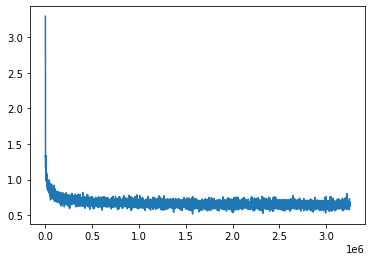

In [39]:
plt.plot(losses)
plt.show()

## Пишем сценарий

In [61]:
def generate_sentence_ext(_text):
  sentence = list(_text)

  state = None
  for i in range(MAX_LEN):
    X = torch.Tensor([[CHAR_TO_INDEX[sentence[i]]]]).type(torch.long).to(dev)
    if i == 0:
      result, state = model.forward(X)
    else:
      result, state = model.forward_state(X, state)
    prediction = result[0, -1, :]
    index_of_prediction = prediction.argmax()
    if i >= len(sentence) - 1:
      if index_of_prediction == 0:
        break
      sentence.append(INDEX_TO_CHAR[index_of_prediction])

  return ''.join(sentence)

In [93]:
def build_scenario():
    old_phrase = ''
    for i in range(10):
        phrases = []
        print(f'Эпизод {i + 1}')
        print(f'Место действия: {choice(locations)}')
        number_actors = randint(2, 5)
        current_actors = list(set(choices(actors, k=number_actors)))
        count_phrases = randint(100, 200)
        print(f'Действующие лица: {", ".join(current_actors)}')
        print()
        actor = choice(current_actors)
        word = choice(actor_words[actor])
        stop_worlds = []

        for j in range(count_phrases):
            stop_worlds.append(word)
            phrase = generate_sentence_ext(word)
            if phrase not in phrases:
                print(f'{actor}: {phrase}')
                phrases.append(phrase)
                _words = phrase.split()
                _words = list(set(_words) & set(actor_words[actor]) - set(stop_worlds))
                if len(_words) == 0:
                    word = choice(actor_words[actor])
                else:
                    word = choice([_word for _word in _words if _word is not np.nan and check_symbols(_word)])
            actor = choice(current_actors)

        print()
        print()

In [94]:
build_scenario()

Эпизод 1
Место действия: CHESTER'S HOUSE
Действующие лица: Apu Nahasapeemapetilon, Kent Brockman, C. Montgomery Burns

C. Montgomery Burns: dont worry i dont know what the seat
C. Montgomery Burns: know youre the best week
Apu Nahasapeemapetilon: youre a story bart i dont know what to go
Apu Nahasapeemapetilon: bart i dont know what the head of the baby
C. Montgomery Burns: baby the story bart i dont know what to go
Apu Nahasapeemapetilon: look at the little bart i want to go to the car
C. Montgomery Burns: lucky the story bart i dont know what to go
Apu Nahasapeemapetilon: boys the state the story boy
C. Montgomery Burns: day i was the best we have to get the car
Kent Brockman: poorerion
C. Montgomery Burns: mayor the story boy i want to get the boy
Apu Nahasapeemapetilon: boy i dont know what the head of the baby
Kent Brockman: boner is the baby i want to go to the car
C. Montgomery Burns: days in the star is so sorry
Kent Brockman: start the car is the best we have to get the train


Lenny Leonard: thats a good look at the baby
Kent Brockman: good lord i want to go to the car
Nelson Muntz: lord is so sorry i dont know what to see
Dr. Julius Hibbert: see you and you simpson


Эпизод 8
Место действия: GUIDANCE COUNSELOR'S
Действующие лица: Krusty the Clown, Homer Simpson, Dr. Julius Hibbert

Homer Simpson: homer what are you doing


Эпизод 9
Место действия: ROAD ON THE WAY TO SCHOOL
Действующие лица: Kent Brockman, Lisa Simpson, C. Montgomery Burns, Grampa Simpson

Lisa Simpson: davah but i dont know what the seat
C. Montgomery Burns: dont worry i dont know what the seat
Kent Brockman: know youre the best week
Lisa Simpson: routell i want to go to the car
Kent Brockman: care and the star is so sorry i dont know
Kent Brockman: take that the way to go to the car
Kent Brockman: sales
Kent Brockman: deadly the story boy i want to get the boy
Lisa Simpson: boy i dont know what the head of the baby
Kent Brockman: baby the story bart i dont know what to go
Grampa Simpson: b

In [46]:
torch.save(model.state_dict(), 'models/simpsons_end.pth')